# Lending Club 
### Case Study

In [425]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings #warning
warnings.filterwarnings('ignore')

In [426]:
# Load data into panda dataframe

df = pd.read_csv('loan.csv', low_memory=False)
pd.set_option('display.max_columns', None)

### Exploring the dataset

In [427]:
# Shape
df.shape

(39717, 111)

In [428]:
# Check  the columns 

df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [429]:
# Check the datatypes

df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [430]:
# Check for missing values

df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [431]:
# Checking the data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [432]:
# Checking the unique values per column
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [433]:
# Duplicate records
df.duplicated().sum()

0

In [434]:
# Columns with all null values

cols_with_missing_vals=df.columns[df.isna().sum()== df.shape[0]]

print(cols_with_missing_vals)

print('Number of columns with missing values: ', cols_with_missing_vals.size)

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

## Cleansing

In [435]:
# Drop columns with missing values

df_cleaned = df.drop(columns = cols_with_missing_vals)

In [436]:
df_cleaned.shape

(39717, 57)

In [437]:
# Retaining columns with only unique values
df_cleaned.columns[df_cleaned.nunique()==1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [438]:
# Further cleaning, dropping all colums with one unique values
df_cleaned.drop(columns=df_cleaned.columns[df_cleaned.nunique()==1], inplace=True)

In [439]:
df_cleaned.shape

(39717, 48)

In [440]:
# Columns

df_cleaned.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [441]:
# Max missing values

df_cleaned.isna().sum(axis=1).max()

7

In [442]:
# Default sorting
df_cleaned.columns.sort_values()

Index(['addr_state', 'annual_inc', 'collection_recovery_fee', 'delinq_2yrs',
       'desc', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title',
       'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'id',
       'inq_last_6mths', 'installment', 'int_rate', 'issue_d',
       'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt',
       'loan_status', 'member_id', 'mths_since_last_delinq',
       'mths_since_last_record', 'next_pymnt_d', 'open_acc', 'out_prncp',
       'out_prncp_inv', 'pub_rec', 'pub_rec_bankruptcies', 'purpose',
       'recoveries', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
       'total_rec_late_fee', 'total_rec_prncp', 'url', 'verification_status',
       'zip_code'],
      dtype='object')

In [443]:
# Columns with 90% null values, to be dropped
cols_90pc_null = df_cleaned.columns[df_cleaned.isna().sum()/ df_cleaned.shape[0] >= 0.9]
print(cols_90pc_null.values)

['mths_since_last_record' 'next_pymnt_d']


In [444]:
# Dropping irrelavant cols
cols_to_be_dropped = ['url', 'desc', 'title', 'zip_code','earliest_cr_line','issue_d','member_id','recoveries','collection_recovery_fee']
cols_to_be_dropped = cols_to_be_dropped + cols_90pc_null.values.tolist()
print(cols_to_be_dropped)

['url', 'desc', 'title', 'zip_code', 'earliest_cr_line', 'issue_d', 'member_id', 'recoveries', 'collection_recovery_fee', 'mths_since_last_record', 'next_pymnt_d']


In [445]:
df_cleaned.drop(columns=cols_to_be_dropped, inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   loan_amnt               39717 non-null  int64  
 2   funded_amnt             39717 non-null  int64  
 3   funded_amnt_inv         39717 non-null  float64
 4   term                    39717 non-null  object 
 5   int_rate                39717 non-null  object 
 6   installment             39717 non-null  float64
 7   grade                   39717 non-null  object 
 8   sub_grade               39717 non-null  object 
 9   emp_title               37258 non-null  object 
 10  emp_length              38642 non-null  object 
 11  home_ownership          39717 non-null  object 
 12  annual_inc              39717 non-null  float64
 13  verification_status     39717 non-null  object 
 14  loan_status             39717 non-null

In [446]:
# Checking some irrelavant fileds according to the metadata
print(df_cleaned.total_rec_int.value_counts())
print(df_cleaned.total_rec_prncp.value_counts())
print(df_cleaned.total_rec_late_fee.value_counts())

0.00       71
1196.57    26
514.52     19
956.78     17
1784.23    17
           ..
494.53      1
1119.88     1
62.31       1
2656.10     1
1695.26     1
Name: total_rec_int, Length: 35148, dtype: int64
10000.00    2293
12000.00    1805
5000.00     1702
6000.00     1637
15000.00    1400
            ... 
1097.81        1
1410.30        1
6968.65        1
3477.49        1
16077.42       1
Name: total_rec_prncp, Length: 7976, dtype: int64
0.000000     37671
15.000000      255
15.000000       58
30.000000       55
15.000000       47
             ...  
35.286832        1
15.000000        1
14.777500        1
14.967774        1
19.890000        1
Name: total_rec_late_fee, Length: 1356, dtype: int64


In [447]:
# dropping the above
df_cleaned.drop(columns=['total_rec_late_fee', 'total_rec_prncp', 'total_rec_int'], inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   loan_amnt               39717 non-null  int64  
 2   funded_amnt             39717 non-null  int64  
 3   funded_amnt_inv         39717 non-null  float64
 4   term                    39717 non-null  object 
 5   int_rate                39717 non-null  object 
 6   installment             39717 non-null  float64
 7   grade                   39717 non-null  object 
 8   sub_grade               39717 non-null  object 
 9   emp_title               37258 non-null  object 
 10  emp_length              38642 non-null  object 
 11  home_ownership          39717 non-null  object 
 12  annual_inc              39717 non-null  float64
 13  verification_status     39717 non-null  object 
 14  loan_status             39717 non-null

In [448]:
#Checking loan status 
print(df_cleaned.loan_status.unique().tolist())

['Fully Paid', 'Charged Off', 'Current']


In [449]:
# Dropping Current loan status for analysis
df_cleaned = df_cleaned[df_cleaned.loan_status != 'Current']

In [450]:
df_cleaned.shape

(38577, 34)

In [451]:
# Checking single valued columns and dropping them off

cols_single_val=df_cleaned.columns[df_cleaned.nunique() == 1]
print(cols_single_val.values)

['out_prncp' 'out_prncp_inv']


In [452]:
df_cleaned.drop(columns=cols_single_val, inplace=True)

In [453]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38577 non-null  int64  
 1   loan_amnt               38577 non-null  int64  
 2   funded_amnt             38577 non-null  int64  
 3   funded_amnt_inv         38577 non-null  float64
 4   term                    38577 non-null  object 
 5   int_rate                38577 non-null  object 
 6   installment             38577 non-null  float64
 7   grade                   38577 non-null  object 
 8   sub_grade               38577 non-null  object 
 9   emp_title               36191 non-null  object 
 10  emp_length              37544 non-null  object 
 11  home_ownership          38577 non-null  object 
 12  annual_inc              38577 non-null  float64
 13  verification_status     38577 non-null  object 
 14  loan_status             38577 non-null

## Custom visualization functions
#### (Internet Sourced)

In [454]:
def histogram(df, xlabel, ylabel, title,xattr,yattr=None, isKDE=True, hue=None, hue_order=None, bins=None):
    plt.figure(figsize=(10,5))
    sns.histplot(data=df, x=xattr, y=yattr,kde=isKDE, hue=hue, hue_order=hue_order, bins=bins)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [455]:
def distplot(df, xlabel, ylabel,title,xattr, yattr=None, isKDE=True, hue=None, hue_order=None):
    plt.figure(figsize=(10,5))
    sns.displot(data=df, x=xattr, y=yattr,kde=isKDE, hue=hue, hue_order=hue_order)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [456]:
def barplot(df, xlabel, ylabel,title,xattr,yattr=None, displayOrder=None,isKDE=True, hue=None, hue_order=None):
    plt.figure(figsize=(10,5))
    sns.barplot(data=df, x=xattr, y=yattr, hue=hue, hue_order=hue_order, order=displayOrder)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [457]:
def boxplot(df, xlabel, ylabel, title, xattr=None,yattr=None, hue=None, hue_order=None, order= None):
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x=xattr, y=yattr, hue=hue, hue_order=hue_order, order= order)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [458]:
def countplot(df, xlabel, ylabel, title, xattr=None,yattr=None, hue=None, hue_order=None):
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=xattr, y=yattr, hue=hue, hue_order=hue_order)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [459]:
def chargedOffLoanPercentage(df, attr):
    # Filtering out all loan data which is "Fully paid"
    df_fp =df[df.loan_status=="Fully Paid"]

    #Filtering out all loan data which is "Charged Off"
    df_co =df[df.loan_status=="Charged Off"]
    
    # Group all the "Fully Paid" loan data by home ownership and calculate the occurance count

    df_fp_attr = df_fp.groupby(by=attr, sort=True)["id"].count().reset_index()

    # Group all the "Charged off" loan data by home ownership and calculate the occurance count
    df_co_attr = df_co.groupby(by=attr, sort=True)["id"].count().reset_index()

    #Indexing the dataframes on home_ownership
    df_fp_attr.set_index(attr, inplace=True)
    df_co_attr.set_index(attr, inplace=True)
    
    #Adding the full paid group by home ownership count to charged off dataframe
    df_co_attr["fully paid"] = df_fp_attr["id"]
    #calculate the percentage of "charged off" loans count on total "charged off" and "fully paid" loan count  
    df_co_attr["charged off percentage"]= df_co_attr.apply(lambda x: x["id"]*100/(x["fully paid"]+x["id"]), axis=1)
    df_co_attr.reset_index(inplace=True)
    df_co_attr.rename(columns = {'id':'charged off'}, inplace = True)
    print(df_co_attr)
    
    return df_co_attr


In [460]:
def iqrAnalysis(df_c,attr):
    print("Analysis of '", attr,"'")
    print("-------------------------")
    print("Median  for loan borrowers for Fully Paid loans", np.quantile(df_c[df_c["loan_status"]=="Fully Paid"][attr],0.5))
    print("Median for loan borrowers for Charged Off loans", np.quantile(df_c[df_c["loan_status"]=="Charged Off"][attr],0.5))
    print("IQR for Fully Paid loans",  np.quantile(df_c[df_c["loan_status"]=="Fully Paid"][attr],0.25),"-", np.quantile(df_c[df_c["loan_status"]=="Fully Paid"][attr],0.75))
    print("IQR for Charged Off loans",  np.quantile(df_c[df_c["loan_status"]=="Charged Off"][attr],0.25),"-", np.quantile(df_c[df_c["loan_status"]=="Charged Off"][attr],0.75))
    print("Max for loan borrowers for Fully Paid loan", np.quantile(df_c[df_c["loan_status"]=="Fully Paid"][attr],1))
    print("Max for loan borrowers for Charged Off loan", np.quantile(df_c[df_c["loan_status"]=="Charged Off"][attr],1))

In [461]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38577 non-null  int64  
 1   loan_amnt               38577 non-null  int64  
 2   funded_amnt             38577 non-null  int64  
 3   funded_amnt_inv         38577 non-null  float64
 4   term                    38577 non-null  object 
 5   int_rate                38577 non-null  object 
 6   installment             38577 non-null  float64
 7   grade                   38577 non-null  object 
 8   sub_grade               38577 non-null  object 
 9   emp_title               36191 non-null  object 
 10  emp_length              37544 non-null  object 
 11  home_ownership          38577 non-null  object 
 12  annual_inc              38577 non-null  float64
 13  verification_status     38577 non-null  object 
 14  loan_status             38577 non-null

In [462]:
# Creating segragting lists for relevent and irrelevant employees
releventAttr = []
irreAttr = []

# Univariate Analysis

## Cutomer attributes

#### Unordered categorical variable 

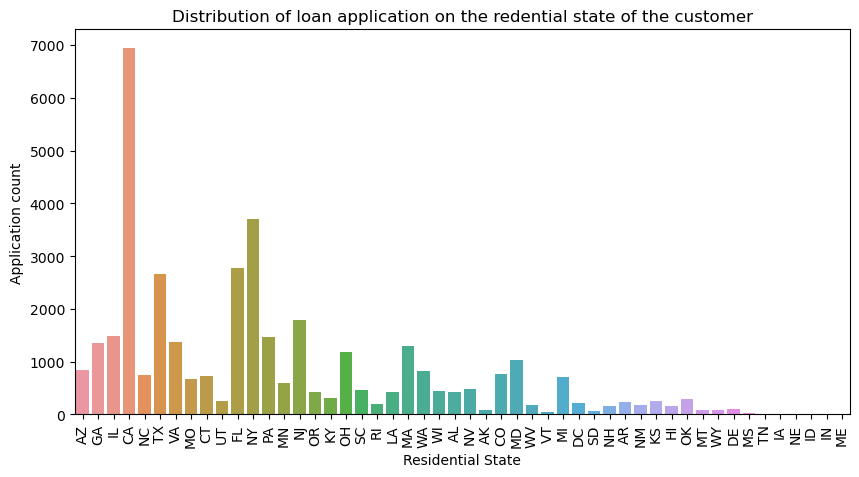

In [463]:
# State
attr_state = "addr_state"

# Loan application count vs Address State of borrower
countplot(df_cleaned,"Residential State","Application count", "Distribution of loan application on the redential state of the customer", attr_state)

   addr_state  charged off  fully paid  charged off percentage
0          AK           15          63               19.230769
1          AL           54         381               12.413793
2          AR           27         208               11.489362
3          AZ          123         726               14.487633
4          CA         1125        5824               16.189380
5          CO           98         668               12.793734
6          CT           94         632               12.947658
7          DC           15         196                7.109005
8          DE           12         101               10.619469
9          FL          504        2277               18.122977
10         GA          215        1144               15.820456
11         HI           28         138               16.867470
12         ID            1           5               16.666667
13         IL          197        1281               13.328823
14         KS           31         224               12

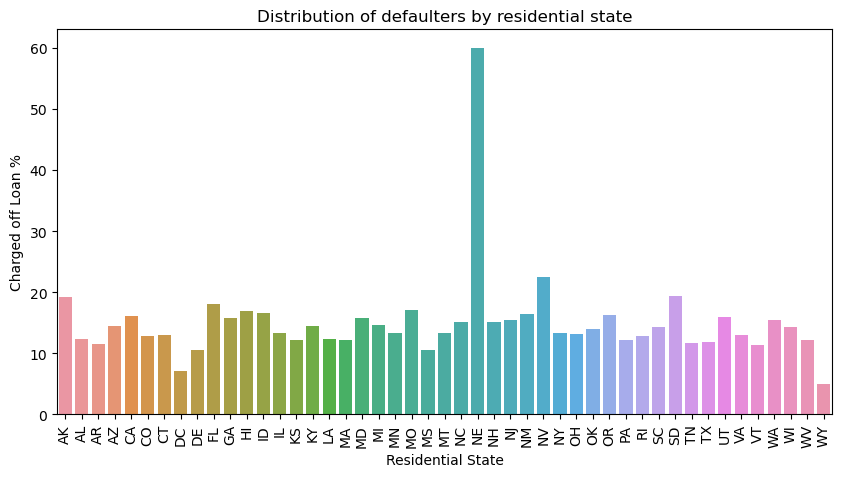

In [464]:
# Defaulters distribution by residential state
df_defaulter_dist_by_state=chargedOffLoanPercentage(df_cleaned, attr_state)
barplot(df_defaulter_dist_by_state, xattr="addr_state", yattr="charged off percentage", xlabel="Residential State", ylabel="Charged off Loan %", title="Distribution of defaulters by residential state")


### Analysis: Inspite of having very high defaulter percentage, the number of borrower is too low to draw a significant pattern

In [465]:
irreAttr.append(attr_state)

### Annul income

<Figure size 1000x500 with 0 Axes>

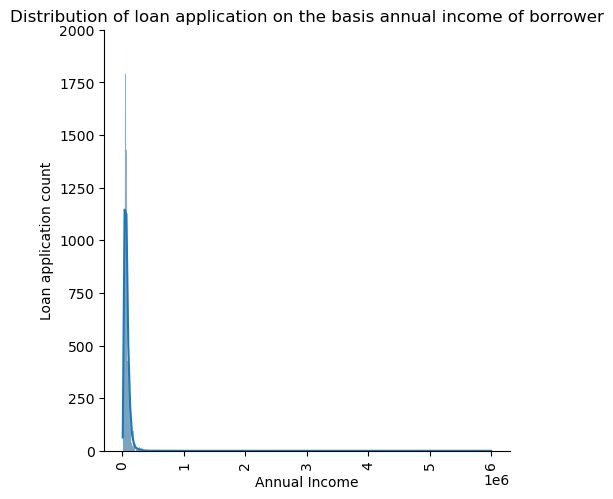

In [466]:
# Annual Income
attr_cust_income="annual_inc"
distplot(df_cleaned,xlabel="Annual Income",ylabel="Loan application count", title="Distribution of loan application on the basis annual income of borrower", xattr=attr_cust_income)


In [467]:
# Too skewed data, calls for outlier removal. Considering between 10 - 90 in first iteration

q90, q10 = np.percentile(df_cleaned["annual_inc"], [90 ,10])
print("90 percentile annual income ", q90)
print("10 percentile annual income ", q10)
iqr = q90 - q10
outliers = q90 + 1.5*iqr

# Extracting the data excluding the annual income outliers
df_outlier_90_10_cleaned = df_cleaned[df_cleaned["annual_inc"]<outliers]

90 percentile annual income  115000.0
10 percentile annual income  30000.0


In [468]:
df_outlier_90_10_cleaned.annual_inc.describe()

count     38228.000000
mean      65481.178611
std       35543.927181
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80459.742500
max      242400.000000
Name: annual_inc, dtype: float64

<Figure size 1000x500 with 0 Axes>

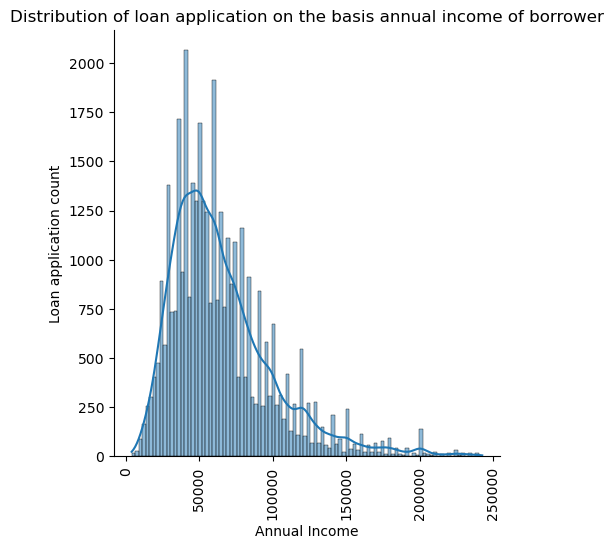

In [469]:
# Distribution after outlier removal
distplot(df_outlier_90_10_cleaned,xlabel="Annual Income",ylabel="Loan application count", title="Distribution of loan application on the basis annual income of borrower", xattr=attr_cust_income)


#### Segmented analysis

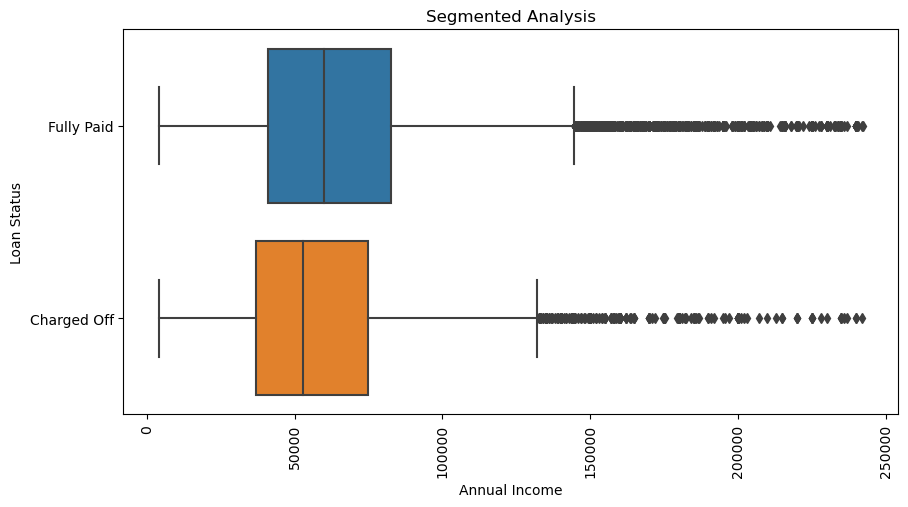

Analysis of ' annual_inc '
-------------------------
Median  for loan borrowers for Fully Paid loans 60000.0
Median for loan borrowers for Charged Off loans 52910.0
IQR for Fully Paid loans 41000.0 - 82506.0
IQR for Charged Off loans 37000.0 - 75000.0
Max for loan borrowers for Fully Paid loan 242400.0
Max for loan borrowers for Charged Off loan 242004.0


In [470]:
#Analysis after removing the outliers

boxplot(df_outlier_90_10_cleaned, xlabel='Annual Income', ylabel="Loan Status", title="Segmented Analysis" , xattr=attr_cust_income,yattr="loan_status")
iqrAnalysis(df_outlier_90_10_cleaned,attr_cust_income)


### Analysis: Borrowers with higher annual income contributed to lower number of defaulters

In [471]:
releventAttr.append(attr_cust_income)

In [472]:
print(releventAttr, irreAttr)

['annual_inc'] ['addr_state']


### Home ownership status

In [473]:
attr_home_ownership = "home_ownership"
df_cleaned.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

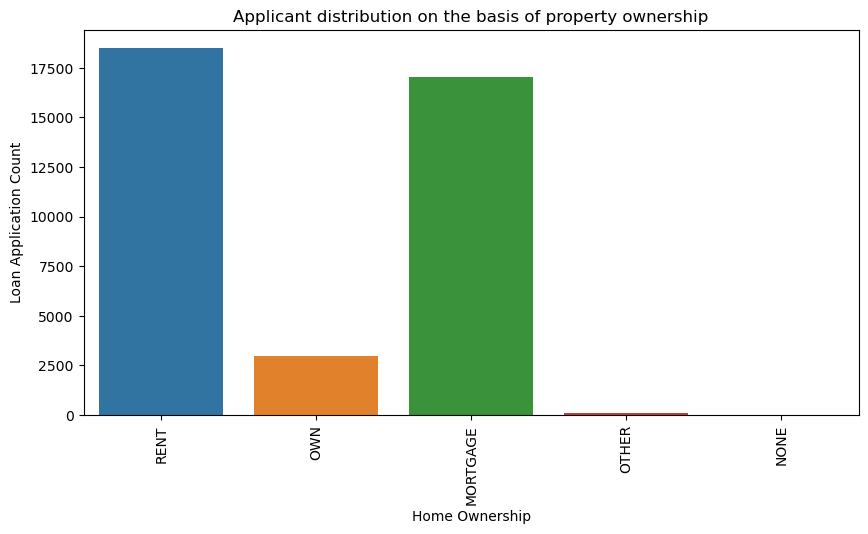

In [474]:
countplot(df_cleaned, "Home Ownership", "Loan Application Count", "Applicant distribution on the basis of property ownership",attr_home_ownership)

  home_ownership  charged off  fully paid  charged off percentage
0       MORTGAGE         2327       14694               13.671347
1          OTHER           18          80               18.367347
2            OWN          443        2532               14.890756
3           RENT         2839       15641               15.362554


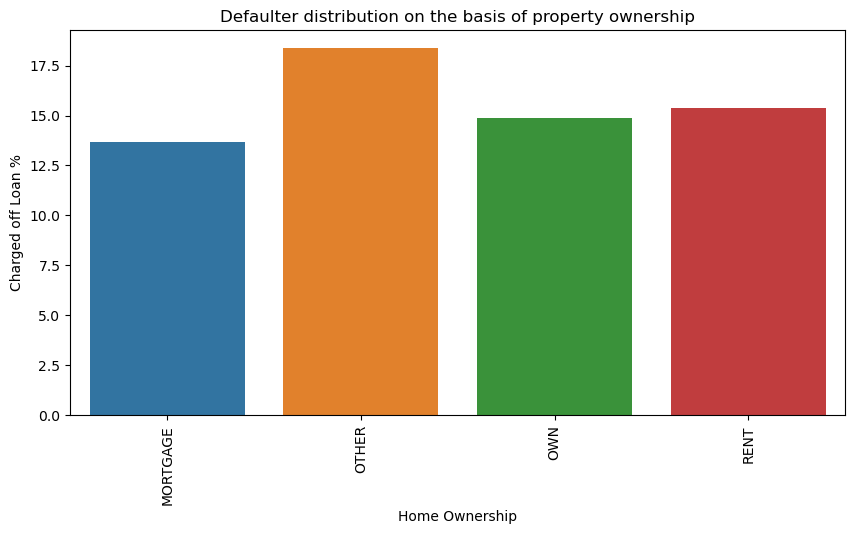

In [475]:
df_defaulter_house_owner = chargedOffLoanPercentage(df_cleaned, attr_home_ownership)

barplot(df_defaulter_house_owner, xattr=attr_home_ownership, yattr="charged off percentage", xlabel="Home Ownership", ylabel="Charged off Loan %", title="Defaulter distribution on the basis of property ownership")

### Anlysis: Though property owners tends to apply less for loans but the the distribution of defaulters is quite even

In [476]:
irreAttr.append(attr_home_ownership)

### Employment tenure

In [477]:
attr_emp_length = "emp_length"
df_cleaned.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [478]:
# Deriving a new column by Converting employment length to numerical values
attr_emp_length_number = "emp_length_number"
df_cleaned[attr_emp_length_number]= df_cleaned.emp_length.apply(lambda x: str(x).replace(' years','').replace('+','').replace('< 1','0').replace(' year',''))
df_el_cleaned= df_cleaned[~df_cleaned.emp_length.isna()]
df_el_cleaned[attr_emp_length_number]= df_el_cleaned.emp_length_number.apply(lambda x: int(x))
df_el_cleaned.emp_length_number.value_counts()

10    8488
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length_number, dtype: int64

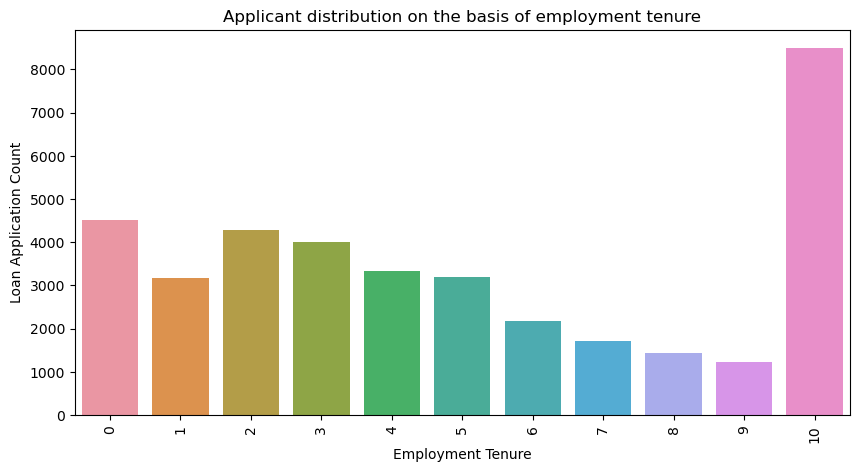

In [479]:
countplot(df_el_cleaned,"Employment Tenure", "Loan Application Count", "Applicant distribution on the basis of employment tenure",attr_emp_length_number)

    emp_length_number  charged off  fully paid  charged off percentage
0                   0          639        3869               14.174800
1                   1          456        2713               14.389397
2                   2          567        3724               13.213703
3                   3          555        3457               13.833500
4                   4          462        2880               13.824057
5                   5          458        2736               14.339386
6                   6          307        1861               14.160517
7                   7          263        1448               15.371128
8                   8          203        1232               14.146341
9                   9          158        1068               12.887439
10                 10         1331        7157               15.680961


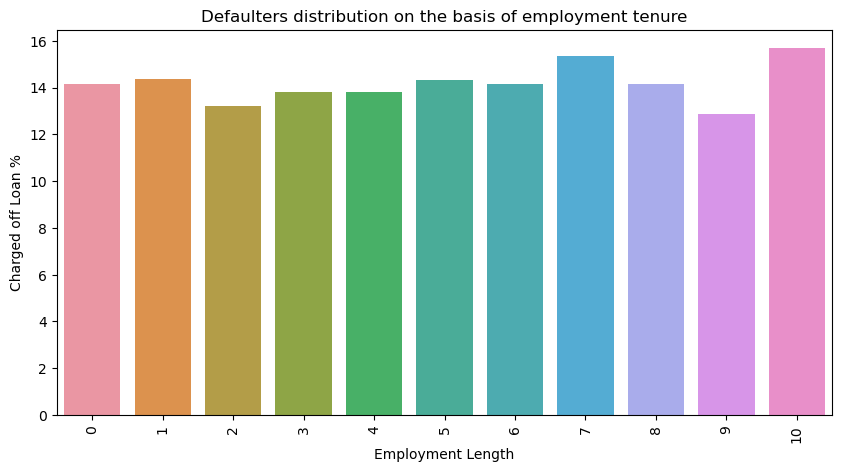

In [480]:
df_defaulter_emp_len= chargedOffLoanPercentage(df_el_cleaned, attr_emp_length_number)
barplot(df_defaulter_emp_len, xattr=attr_emp_length_number, yattr="charged off percentage", xlabel="Employment Length", ylabel="Charged off Loan %", title="Defaulters distribution on the basis of employment tenure")


### Analysis: There is a slight increse in defaulters for borrowers having employment tenure more than 1o years

In [481]:
irreAttr.append(attr_emp_length)
releventAttr.append(attr_emp_length_number)
print(releventAttr, irreAttr)

['annual_inc', 'emp_length_number'] ['addr_state', 'home_ownership', 'emp_length']


## Loan Attributes

### Grade and Sub Grade

In [482]:
attr_grade = "grade"
attr_sub_grade = "sub_grade"

In [483]:
df_cleaned.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [484]:
df_cleaned.sub_grade.value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [485]:
df_cleaned.groupby([attr_grade, attr_sub_grade]).size()

grade  sub_grade
A      A1           1139
       A2           1508
       A3           1810
       A4           2873
       A5           2715
B      B1           1797
       B2           2001
       B3           2825
       B4           2437
       B5           2615
C      C1           2055
       C2           1931
       C3           1488
       C4           1206
       C5           1154
D      D1            931
       D2           1286
       D3           1116
       D4            918
       D5            834
E      E1            722
       E2            614
       E3            516
       E4            424
       E5            387
F      F1            305
       F2            233
       F3            174
       F4            151
       F5            113
G      G1             94
       G2             77
       G3             45
       G4             54
       G5             29
dtype: int64

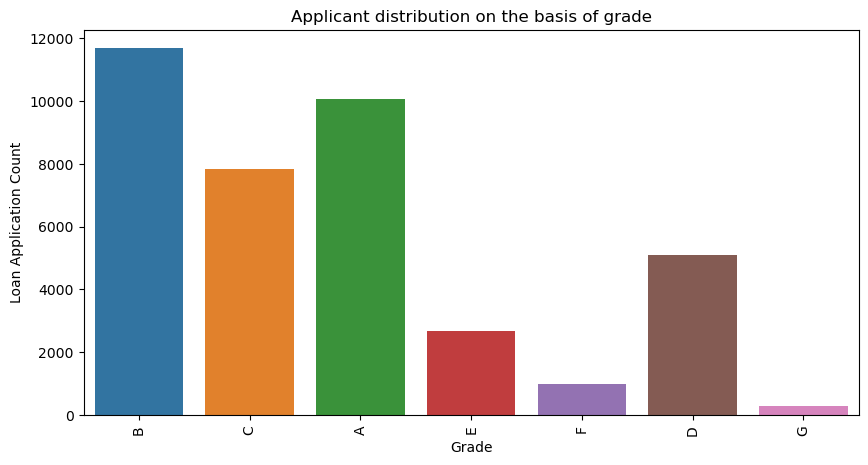

In [486]:
countplot(df_cleaned,"Grade", "Loan Application Count", "Applicant distribution on the basis of grade",attr_grade)

  grade  charged off  fully paid  charged off percentage
0     A          602        9443                5.993031
1     B         1425       10250               12.205567
2     C         1347        6487               17.194281
3     D         1118        3967               21.986234
4     E          715        1948               26.849418
5     F          319         657               32.684426
6     G          101         198               33.779264


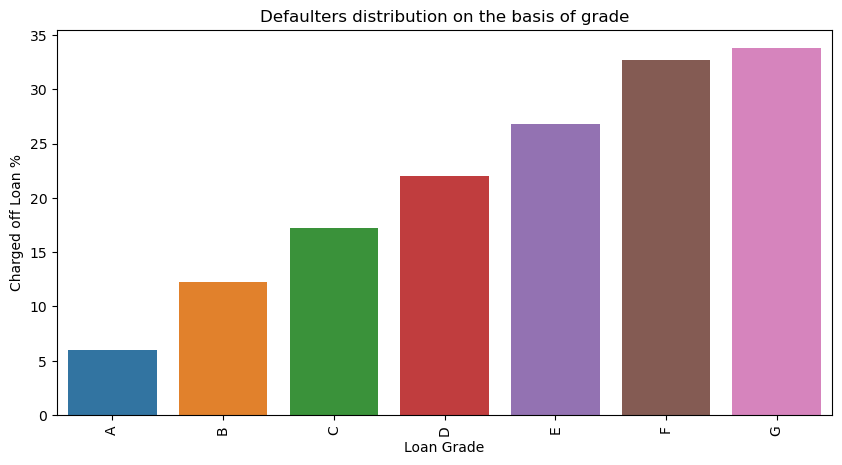

In [487]:
df_defaulters= chargedOffLoanPercentage(df_cleaned, attr_grade)
barplot(df_defaulters, xattr=attr_grade, yattr="charged off percentage", xlabel="Loan Grade", ylabel="Charged off Loan %", title="Defaulters distribution on the basis of grade")


### Analysis: The riskier the grade the higher the number of faulting in a consistent trend 

In [488]:
releventAttr.append(attr_grade)

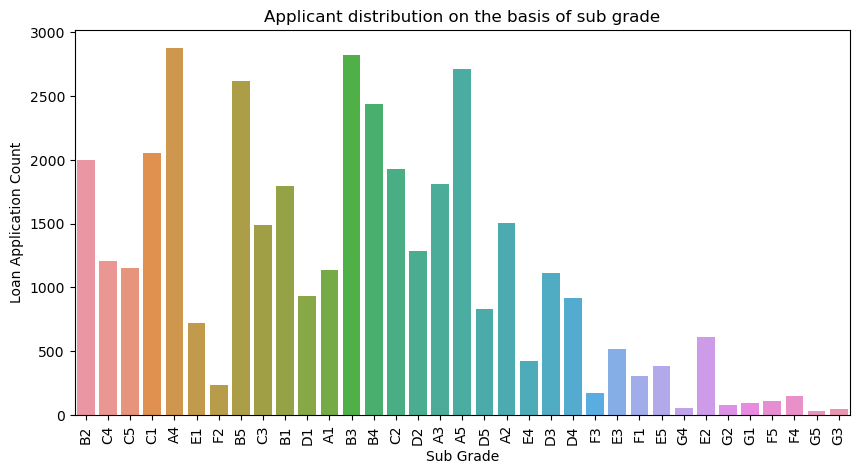

   sub_grade  charged off  fully paid  charged off percentage
0         A1           30        1109                2.633889
1         A2           74        1434                4.907162
2         A3          103        1707                5.690608
3         A4          178        2695                6.195614
4         A5          217        2498                7.992634
5         B1          171        1626                9.515860
6         B2          228        1773               11.394303
7         B3          341        2484               12.070796
8         B4          329        2108               13.500205
9         B5          356        2259               13.613767
10        C1          336        1719               16.350365
11        C2          321        1610               16.623511
12        C3          270        1218               18.145161
13        C4          212         994               17.578773
14        C5          208         946               18.024263
15      

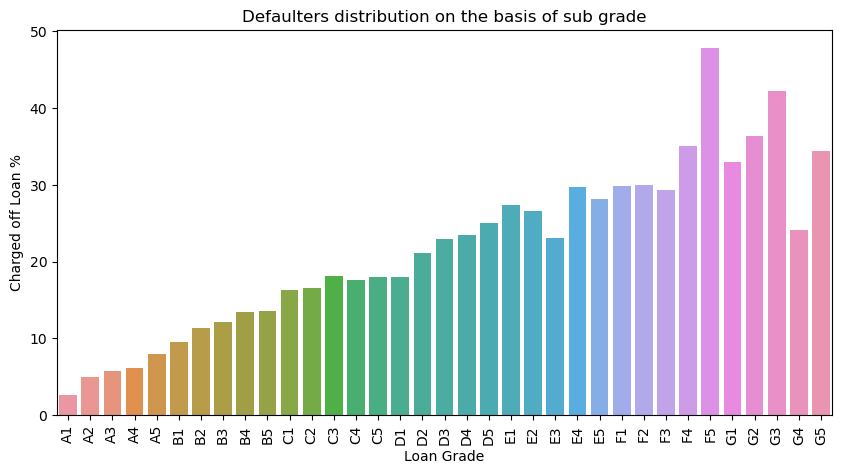

In [489]:
countplot(df_cleaned,"Sub Grade", "Loan Application Count", "Applicant distribution on the basis of sub grade",attr_sub_grade)
df_defaulters= chargedOffLoanPercentage(df_cleaned, attr_sub_grade)
barplot(df_defaulters, xattr=attr_sub_grade, yattr="charged off percentage", xlabel="Loan Grade", ylabel="Charged off Loan %", title="Defaulters distribution on the basis of sub grade")


### Analysis: The same trend as grade is further confirmed with F5 and G3 contributes to highest defaulters 

In [490]:
releventAttr.append(attr_sub_grade)

### Verified source of Income

In [491]:
attr_verification_status = "verification_status"

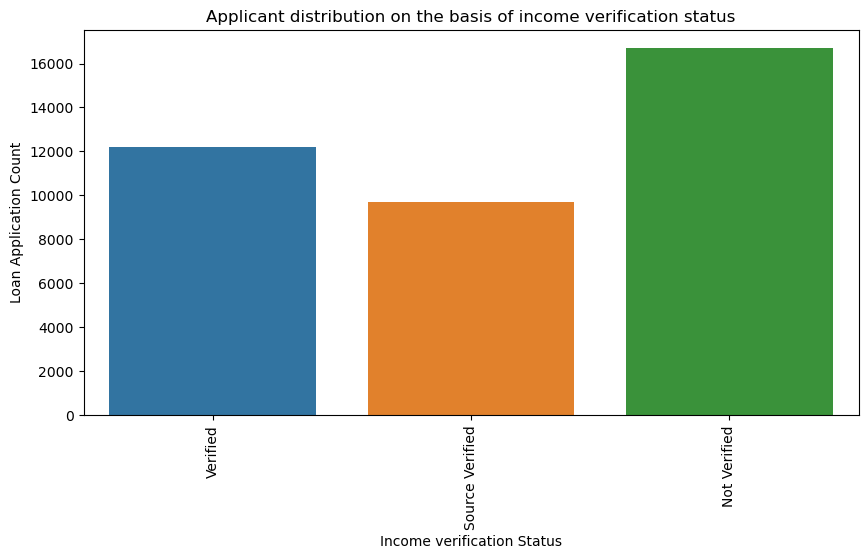

  verification_status  charged off  fully paid  charged off percentage
0        Not Verified         2142       14552               12.830957
1     Source Verified         1434        8243               14.818642
2            Verified         2051       10155               16.803212


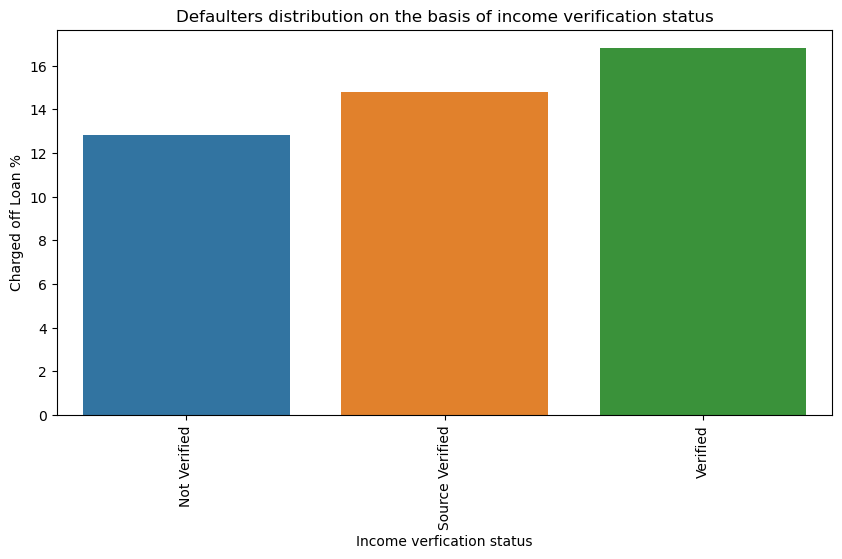

In [492]:
countplot(df_cleaned,"Income verification Status", "Loan Application Count", "Applicant distribution on the basis of income verification status",attr_verification_status)
df_defaulters= chargedOffLoanPercentage(df_cleaned, attr_verification_status)
barplot(df_defaulters, xattr=attr_verification_status, yattr="charged off percentage", xlabel="Income verfication status", ylabel="Charged off Loan %", title="Defaulters distribution on the basis of income verification status")


### Analysis: The defaulters distribution is quite even across the Income verification status group

In [493]:
irreAttr.append(attr_verification_status)

### Purpose

In [494]:
attr_purpose="purpose"

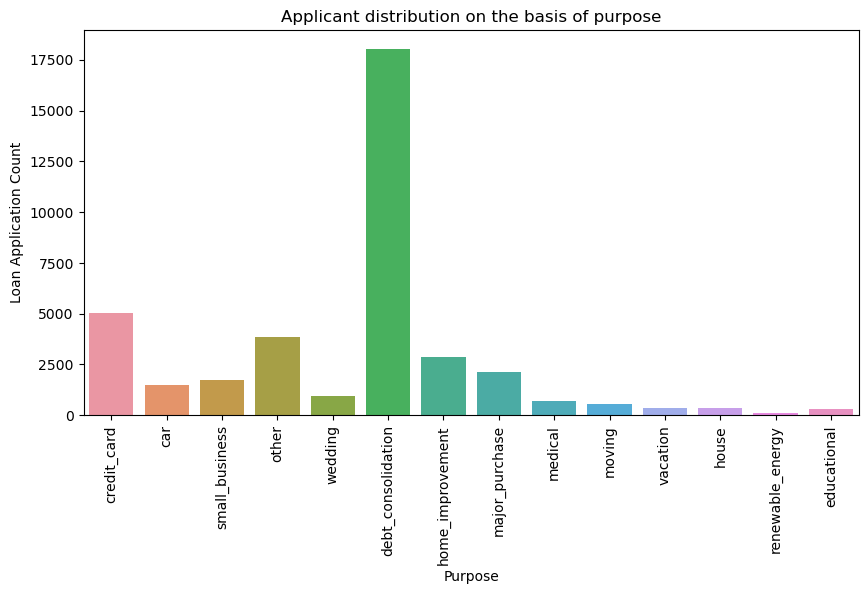

               purpose  charged off  fully paid  charged off percentage
0                  car          160        1339               10.673783
1          credit_card          542        4485               10.781778
2   debt_consolidation         2767       15288               15.325395
3          educational           56         269               17.230769
4     home_improvement          347        2528               12.069565
5                house           59         308               16.076294
6       major_purchase          222        1928               10.325581
7              medical          106         575               15.565345
8               moving           92         484               15.972222
9                other          633        3232               16.377749
10    renewable_energy           19          83               18.627451
11      small_business          475        1279               27.080958
12            vacation           53         322               14

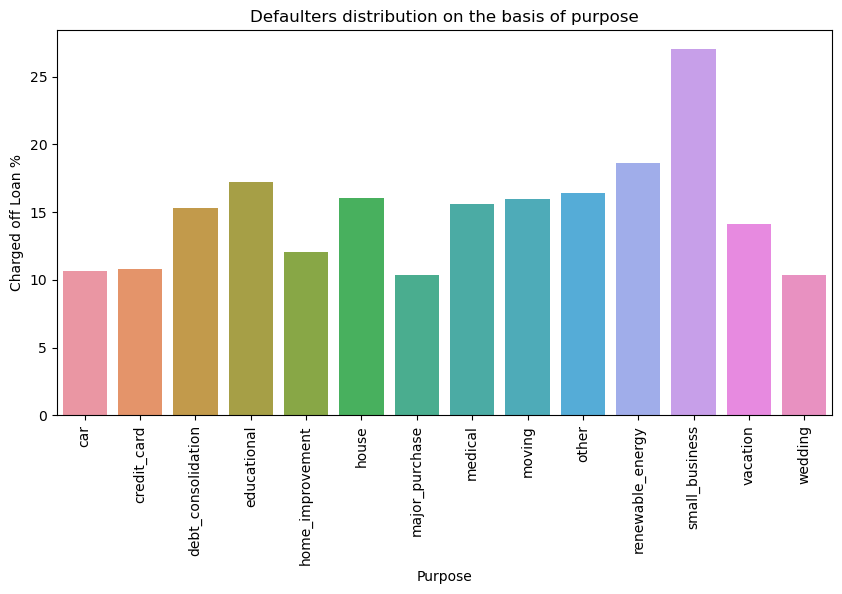

In [495]:
countplot(df_cleaned,"Purpose", "Loan Application Count", "Applicant distribution on the basis of purpose",attr_purpose)
df_defaulters= chargedOffLoanPercentage(df_cleaned, attr_purpose)
barplot(df_defaulters, xattr=attr_purpose, yattr="charged off percentage", xlabel="Purpose", ylabel="Charged off Loan %", title="Defaulters distribution on the basis of purpose")


### Analysis: 
- Number of applicants for debt consolidation is the highest and significantly higher than the next highest credit card
- Number of defaulters is significantly higher for small business (27%) even if it is compared with next highest renewal energy (18%)


In [496]:
releventAttr.append(attr_purpose)

### Debt to Income Ration (DTI)

In [497]:
attr_dti="dti"
df_cleaned.dti.value_counts()

0.00     178
12.00     46
18.00     45
19.20     39
13.20     39
        ... 
28.95      1
25.85      1
25.77      1
27.20      1
25.43      1
Name: dti, Length: 2853, dtype: int64

In [498]:
# Derive a new colum with rounded off values
df_cleaned["dti_mod"] = df_cleaned.dti.apply(lambda x: np.round(x))
df_cleaned.dti_mod.value_counts()

14.0    2034
13.0    1967
15.0    1920
11.0    1865
12.0    1859
16.0    1853
10.0    1832
17.0    1763
9.0     1741
18.0    1739
8.0     1698
19.0    1654
20.0    1647
21.0    1461
7.0     1459
6.0     1420
22.0    1418
5.0     1270
23.0    1268
4.0     1167
24.0    1114
3.0      956
2.0      949
1.0      843
25.0     616
0.0      520
26.0     151
27.0     129
28.0     123
29.0     109
30.0      32
Name: dti_mod, dtype: int64

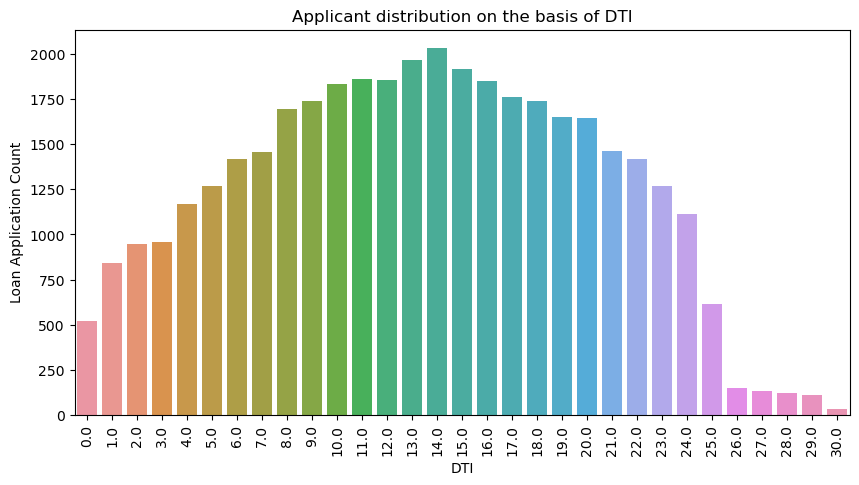

    dti_mod  charged off  fully paid  charged off percentage
0       0.0           59         461               11.346154
1       1.0          111         732               13.167260
2       2.0          123         826               12.961012
3       3.0          114         842               11.924686
4       4.0          148        1019               12.682091
5       5.0          146        1124               11.496063
6       6.0          173        1247               12.183099
7       7.0          177        1282               12.131597
8       8.0          224        1474               13.191991
9       9.0          238        1503               13.670304
10     10.0          235        1597               12.827511
11     11.0          248        1617               13.297587
12     12.0          279        1580               15.008069
13     13.0          288        1679               14.641586
14     14.0          320        1714               15.732547
15     15.0          276

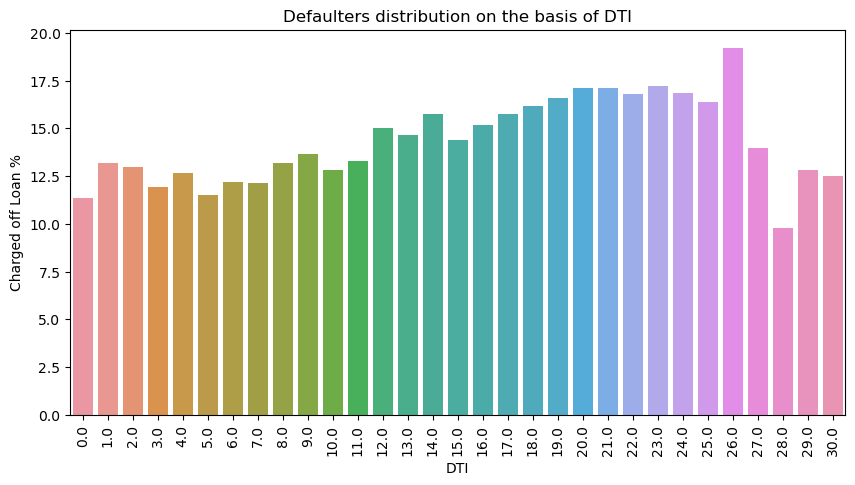

In [499]:
attr_dti_mod="dti_mod"
countplot(df_cleaned,"DTI", "Loan Application Count", "Applicant distribution on the basis of DTI",attr_dti_mod)
df_defaulters= chargedOffLoanPercentage(df_cleaned, attr_dti_mod)
barplot(df_defaulters, xattr=attr_dti_mod, yattr="charged off percentage", xlabel="DTI", ylabel="Charged off Loan %", title="Defaulters distribution on the basis of DTI")


In [500]:
iqrAnalysis(df_cleaned, 'dti')

Analysis of ' dti '
-------------------------
Median  for loan borrowers for Fully Paid loans 13.2
Median for loan borrowers for Charged Off loans 14.29
IQR for Fully Paid loans 7.98 - 18.39
IQR for Charged Off loans 9.05 - 19.29
Max for loan borrowers for Fully Paid loan 29.99
Max for loan borrowers for Charged Off loan 29.85


### Analysis: Defaulters and fully paid off customers are evenly distributed among the DTI range, no specific trend can be find here.

In [501]:
irreAttr.append(attr_dti)

In [502]:
print(releventAttr, irreAttr)

['annual_inc', 'emp_length_number', 'grade', 'sub_grade', 'purpose'] ['addr_state', 'home_ownership', 'emp_length', 'verification_status', 'dti']


### Inquiries in last 6 months

In [503]:
aatr_inq6 = "inq_last_6mths"

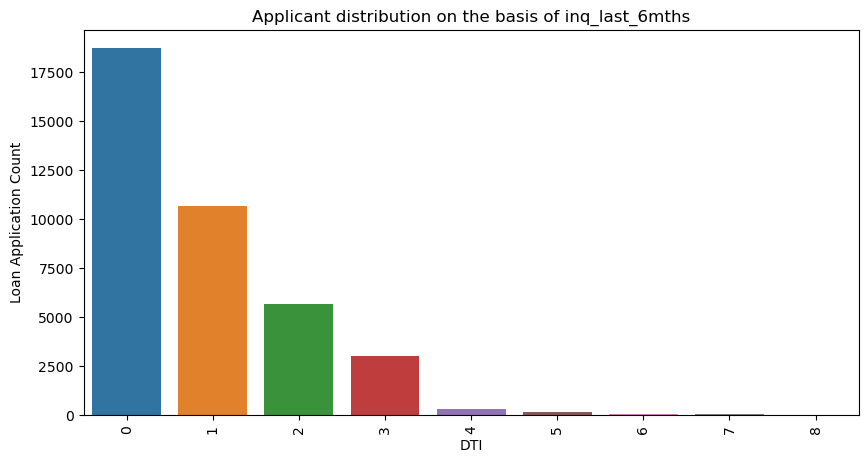

   inq_last_6mths  charged off  fully paid  charged off percentage
0               0         2280       16429               12.186648
1               1         1677        8983               15.731707
2               2          943        4711               16.678458
3               3          619        2364               20.750922
4               4           51         265               16.139241
5               5           28         116               19.444444
6               6           16          47               25.396825
7               7           10          24               29.411765
8               8            3          11               21.428571


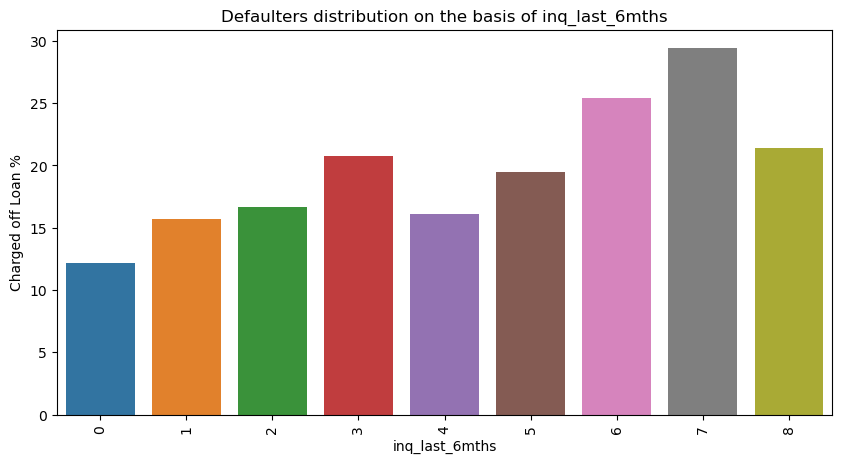

In [504]:
countplot(df_cleaned,"DTI", "Loan Application Count", "Applicant distribution on the basis of inq_last_6mths",aatr_inq6)
df_defaulters= chargedOffLoanPercentage(df_cleaned, aatr_inq6)
barplot(df_defaulters, xattr=aatr_inq6, yattr="charged off percentage", xlabel="inq_last_6mths", ylabel="Charged off Loan %", title="Defaulters distribution on the basis of inq_last_6mths")


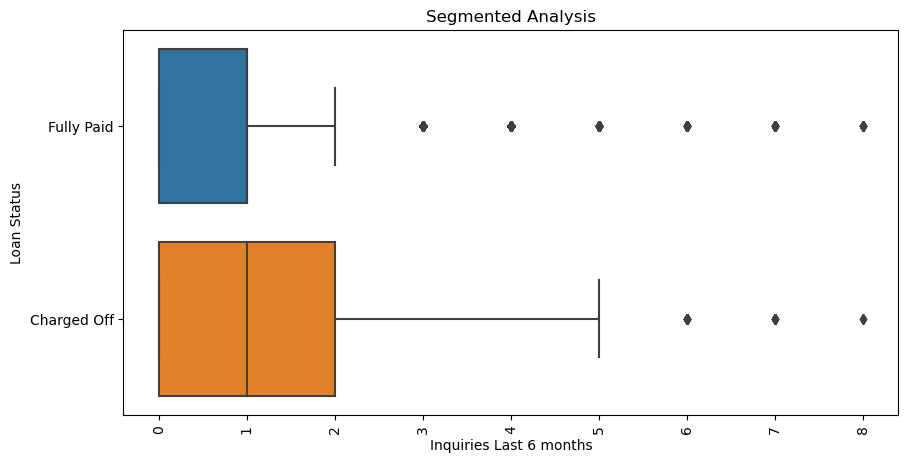

In [505]:
boxplot(df_cleaned, xlabel="Inquiries Last 6 months", ylabel="Loan Status", title="Segmented Analysis" , xattr="inq_last_6mths",yattr="loan_status")


### Analysis: The trend shows higher the inq_last_6mths value, higher the risk of defaulting.

In [506]:
releventAttr.append(aatr_inq6)

### Derogatory public records

In [507]:
attr_pub_rec = "pub_rec"

In [508]:
df_cleaned.pub_rec.value_counts()

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

In [509]:
df_cleaned.pub_rec.info()

<class 'pandas.core.series.Series'>
Int64Index: 38577 entries, 0 to 39716
Series name: pub_rec
Non-Null Count  Dtype
--------------  -----
38577 non-null  int64
dtypes: int64(1)
memory usage: 1.6 MB


In [510]:
# Cleansing
df_pubrec_cleaned = df_cleaned[~ df_cleaned.pub_rec.isna()]
df_pubrec_cleaned.pub_rec = df_pubrec_cleaned.pub_rec.apply(lambda x: int(x))

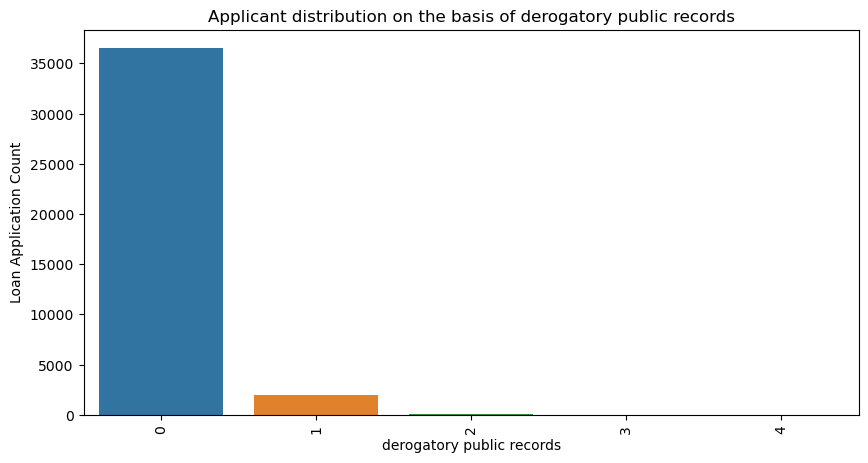

   pub_rec  charged off  fully paid  charged off percentage
0        0         5160       31347               14.134276
1        1          457        1556               22.702434
2        2           10          38               20.833333


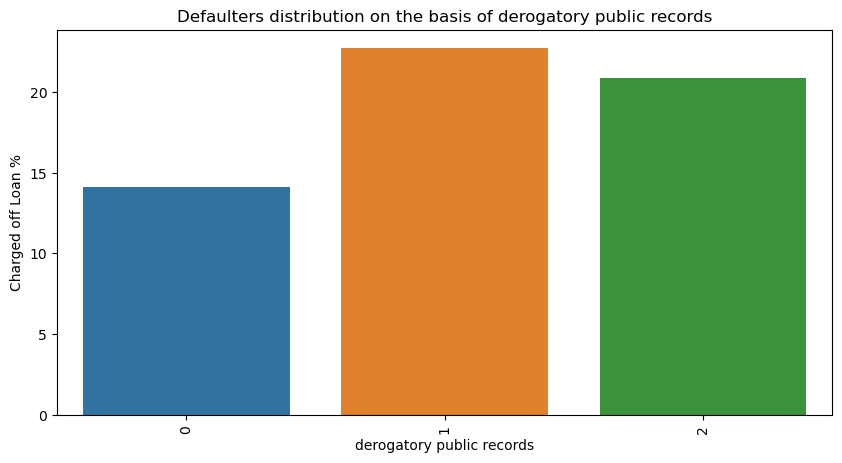

In [511]:
countplot(df_pubrec_cleaned,"derogatory public records", "Loan Application Count", "Applicant distribution on the basis of derogatory public records",attr_pub_rec)
df_defaulters= chargedOffLoanPercentage(df_pubrec_cleaned, attr_pub_rec)
barplot(df_defaulters, xattr=attr_pub_rec, yattr="charged off percentage", xlabel="derogatory public records", ylabel="Charged off Loan %", title="Defaulters distribution on the basis of derogatory public records")


### Analysis: Chance of defaulting is higher with the borrowers having derogatory public records than who don't have

In [512]:
releventAttr.append(attr_pub_rec)

### Public record bankruptcies

In [513]:
df_cleaned.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [514]:
attr_banrpt="pub_rec_bankruptcies"

In [515]:
# Cleansing
df_pro_cleaned = df_cleaned[~ df_cleaned.pub_rec_bankruptcies.isna()]
df_pro_cleaned.pub_rec_bankruptcies = df_pro_cleaned.pub_rec_bankruptcies.apply(lambda x: int(x))

In [516]:
df_pro_cleaned.pub_rec_bankruptcies.value_counts()

0    36238
1     1637
2        5
Name: pub_rec_bankruptcies, dtype: int64

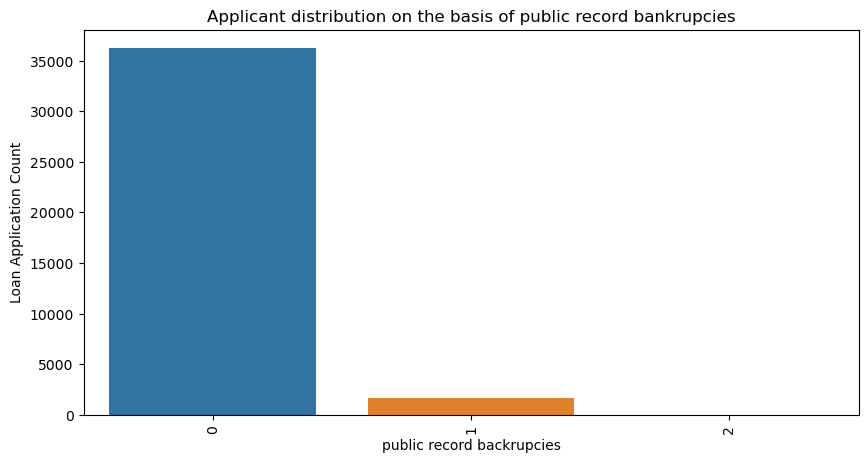

   pub_rec_bankruptcies  charged off  fully paid  charged off percentage
0                     0         5141       31097               14.186765
1                     1          366        1271               22.357972
2                     2            2           3               40.000000


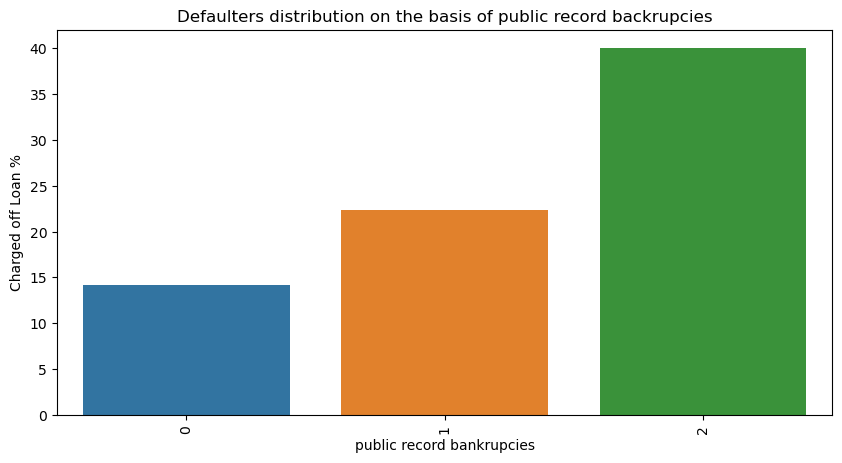

In [517]:
countplot(df_pro_cleaned,"public record backrupcies", "Loan Application Count", "Applicant distribution on the basis of public record bankrupcies",attr_banrpt)
df_defaulters= chargedOffLoanPercentage(df_pro_cleaned, attr_banrpt)
barplot(df_defaulters, xattr=attr_banrpt, yattr="charged off percentage", xlabel="public record bankrupcies", ylabel="Charged off Loan %", title="Defaulters distribution on the basis of public record backrupcies")


### Analysis: With increase of public record bankruptcies the number of defaulters increases

In [518]:
releventAttr.append(attr_banrpt)

### Term

In [519]:
attr_term="term"

In [520]:
df_cleaned.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

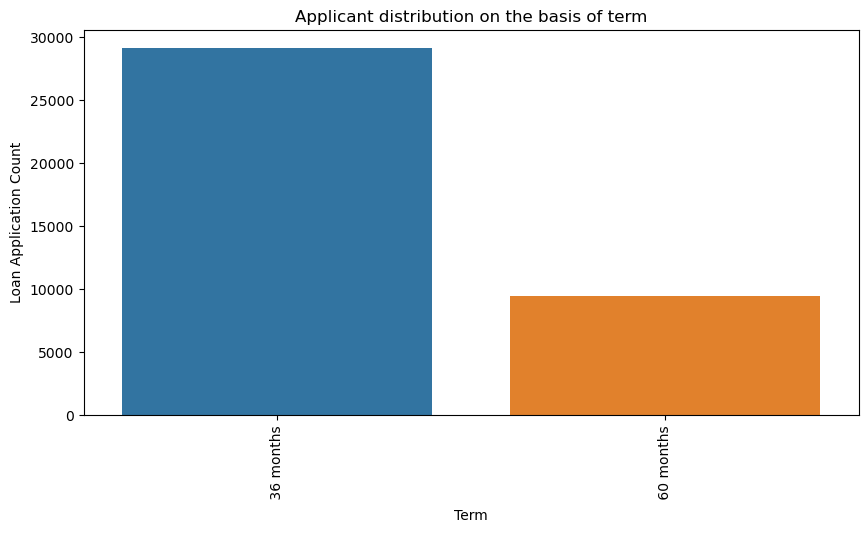

         term  charged off  fully paid  charged off percentage
0   36 months         3227       25869               11.090872
1   60 months         2400        7081               25.313785


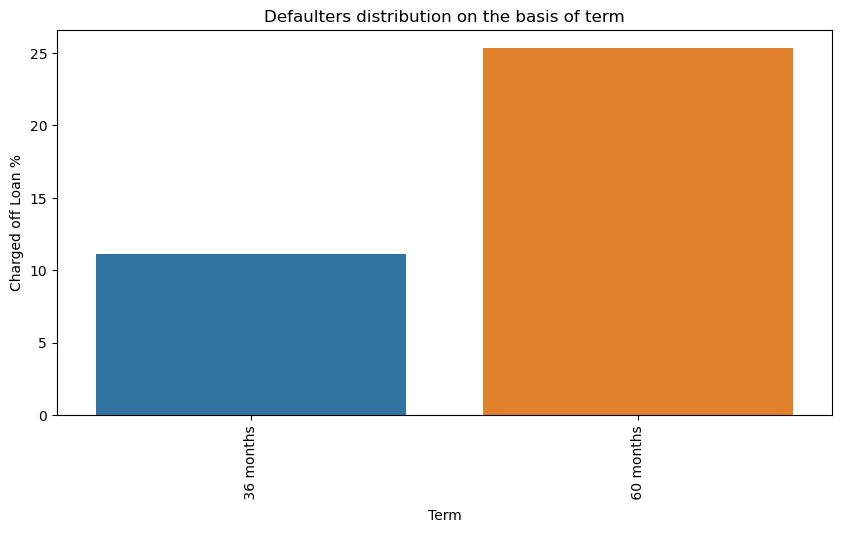

In [521]:
countplot(df_cleaned,"Term", "Loan Application Count", "Applicant distribution on the basis of term",attr_term)
df_defaulters= chargedOffLoanPercentage(df_cleaned, attr_term)
barplot(df_defaulters, xattr=attr_term, yattr="charged off percentage", xlabel="Term", ylabel="Charged off Loan %", title="Defaulters distribution on the basis of term")


### Analysis: Loans with terms of 60 months attracts more risk of defaulting

In [522]:
releventAttr.append(attr_term)

### Interest Rate

In [523]:
attr_ir = "int_rate"

In [524]:
df_cleaned.int_rate.value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [525]:
# Cleansing
df_cleaned["int_rate_round"] = df_cleaned.int_rate.apply(lambda x: int(np.round(float(x.replace("%",'')))))
df_cleaned.int_rate_round.value_counts()

11    4953
13    4602
10    3398
8     3367
7     3267
12    3104
14    2835
16    2614
15    2546
6     1530
9     1504
17    1411
18    1095
19     788
5      573
20     446
21     308
22     171
23      42
24      23
Name: int_rate_round, dtype: int64

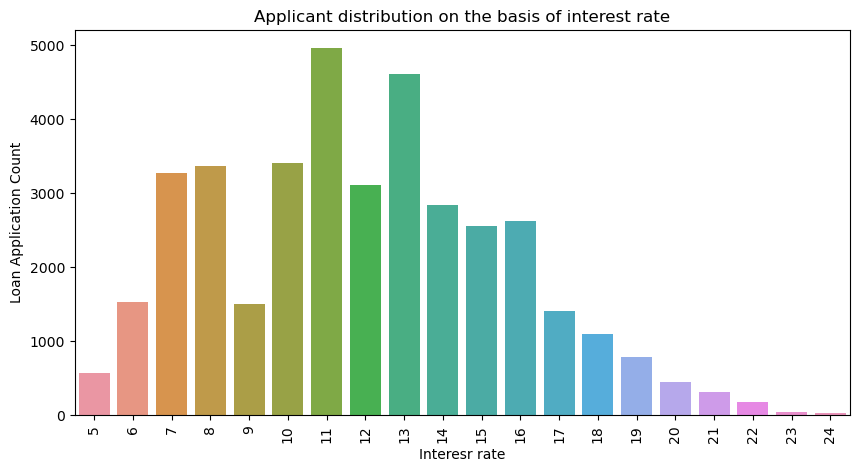

    int_rate_round  charged off  fully paid  charged off percentage
0                5           20         553                3.490401
1                6           51        1479                3.333333
2                7          185        3082                5.662687
3                8          238        3129                7.068607
4                9          124        1380                8.244681
5               10          362        3036               10.653325
6               11          610        4343               12.315768
7               12          472        2632               15.206186
8               13          729        3873               15.840939
9               14          491        2344               17.319224
10              15          494        2052               19.402985
11              16          567        2047               21.690895
12              17          374        1037               26.506024
13              18          298         797     

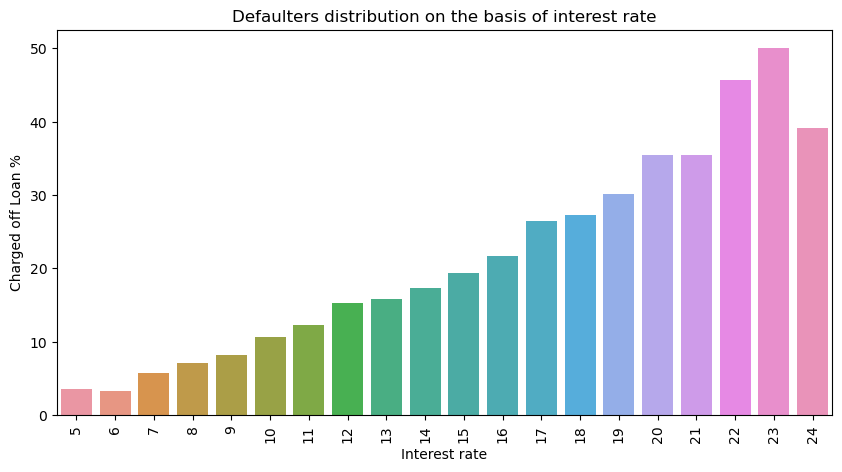

In [526]:
attr_ir_round = "int_rate_round"
countplot(df_cleaned,"Interesr rate", "Loan Application Count", "Applicant distribution on the basis of interest rate",attr_ir_round)
df_defaulters= chargedOffLoanPercentage(df_cleaned, attr_ir_round)
barplot(df_defaulters, xattr=attr_ir_round, yattr="charged off percentage", xlabel="Interest rate", ylabel="Charged off Loan %", title="Defaulters distribution on the basis of interest rate")


### Analysis: With increase of interest rate, the risk of defaulting increases

In [527]:
releventAttr.append(attr_ir)

# Bivariate Analysis

### Terms - Interest Rate

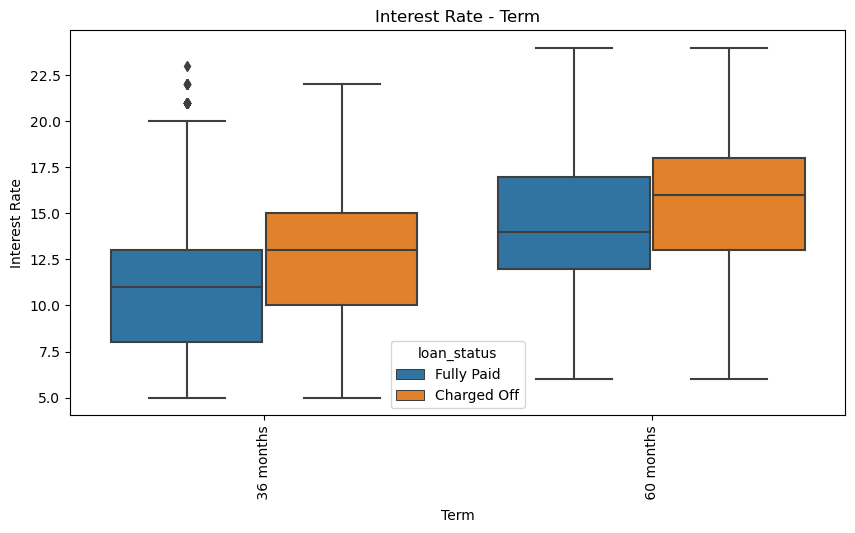

In [528]:
boxplot(df_cleaned, xlabel="Term", ylabel="Interest Rate", title="Interest Rate - Term" , xattr="term", yattr="int_rate_round", hue ='loan_status')

### Analysis: 
- Interest rate increases with loan terms
- Irrespective of terms, risk of defaulting increase with increment of interest rate

### Terms - Loan Amont

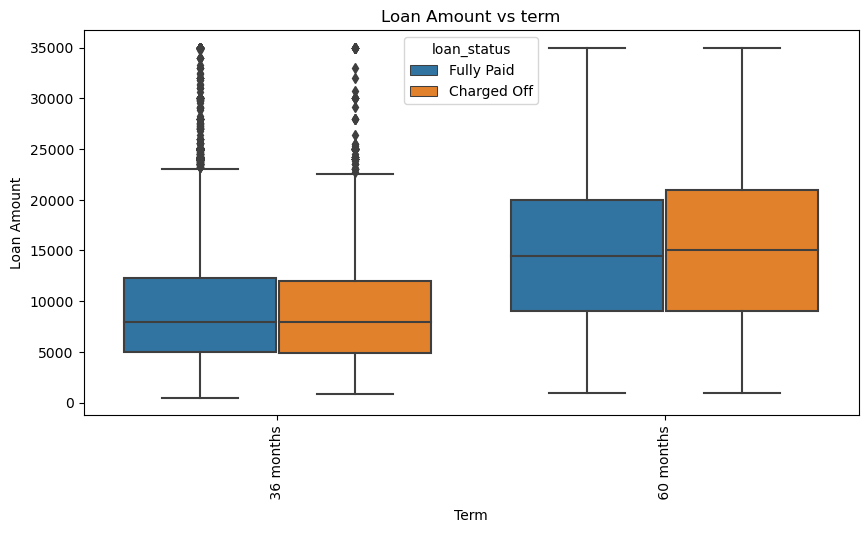

In [529]:
boxplot(df_cleaned, xlabel="Term", ylabel="Loan Amount", title="Loan Amount vs term" , xattr="term",yattr="loan_amnt", hue ='loan_status')

### Analysis:
- Loan amount increases with loan terms
- A relation with risk of defaulting can't be determined for the same

### Grade - Interest rate

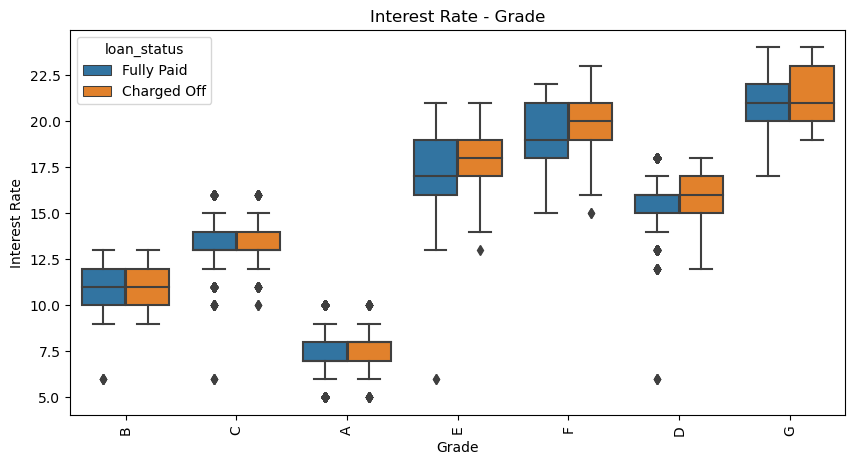

In [530]:
boxplot(df_cleaned, xlabel="Grade", ylabel="Interest Rate", title="Interest Rate - Grade" , xattr="grade", yattr="int_rate_round", hue ='loan_status')

In [531]:
print(releventAttr, irreAttr)

['annual_inc', 'emp_length_number', 'grade', 'sub_grade', 'purpose', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 'term', 'int_rate'] ['addr_state', 'home_ownership', 'emp_length', 'verification_status', 'dti']
